# Opiod Prescription Project: Exploratory Data Analysis
_Data from Kaggle_: https://www.kaggle.com/apryor6/us-opiate-prescriptions

## I. Data Prep

### Imports

In [1]:
import pandas as pd  # DataFrame, Series
import numpy as np  # Scientific Computing Packages - Array
import re  # Regularized Expression

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns  # Stats Visualization Library, wraps on top of matplotlib

%matplotlib inline

### Load Data

In [2]:
# Dataframe of opioid drugs and their generic brand equivalents
opioid = pd.read_csv("input/opioids.csv")

# Dataframe of states, total populations, deaths, and state abbrev.
overdose = pd.read_csv("input/overdoses.csv")

# Dataframe of prescribers and features below
prescriber = pd.read_csv("input/prescriber-info.csv")

#### Features in prescriber
* **NPI** – unique National Provider Identifier number  
* **Gender** - (M/F)  
* **State**  - U.S. State by abbreviation  
* **Credentials** - set of initials indicative of medical degree  
* **Specialty** - description of type of medicinal practice  
* A long list of drugs with numeric values indicating the total number of prescriptions written for the year by that individual  
* **Opioid.Prescriber** - a boolean label indicating whether or not that individual prescribed opiate drugs more than 10 times in the year

In [3]:
opioid.head()

,Drug Name,Generic Name
0,ABSTRAL,FENTANYL CITRATE
1,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE
2,ACTIQ,FENTANYL CITRATE
3,ASCOMP WITH CODEINE,CODEINE/BUTALBITAL/ASA/CAFFEIN
4,ASPIRIN-CAFFEINE-DIHYDROCODEIN,DIHYDROCODEINE/ASPIRIN/CAFFEIN


In [3]:
prescriber.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [45]:
overdose.head()

,State,Population,Deaths,Abbrev,PopNum,DeathNum
0,Alabama,"4,833,722",723,AL,4833722,723
1,Alaska,"735,132",124,AK,735132,124
2,Arizona,"6,626,624","1,211",AZ,6626624,1211
3,Arkansas,"2,959,373",356,AR,2959373,356
4,California,"38,332,521","4,521",CA,38332521,4521


### Convert Population and Deaths to Integers for Plotting
Population and Deaths are strings with ','s in original overdose DF

In [40]:
overdose['PopNum'] = overdose['Population']
overdose['DeathNum'] = overdose['Deaths']

import re

# Remove commas
overdose['PopNum'] = list(re.sub(r',', '', x) for x in overdose['PopNum'])
overdose['DeathNum'] = list(re.sub(r',', '', x) for x in overdose['DeathNum'])

# Convert str to int
overdose['PopNum'] = list(map(int, overdose['PopNum']))
overdose['DeathNum'] = list(map(int, overdose['DeathNum']))

### Create List of Opioids that were Actually Prescribed

In [4]:
# List of all opioid drugs from opioid DF
## Replace spaces with '.'
ops = list(re.sub(r'[-\s]','.',x) for x in opioid.values[:,0])
# len(ops)  # 113

# List of opioid drugs that were actually prescribed
rxOps = list(set(ops) & set(prescriber.columns))
# len(rxOps)  # 11

# rxOps = 
# ['FENTANYL',
#  'OXYCODONE.HCL',
#  'MORPHINE.SULFATE.ER',
#  'OXYCONTIN',
#  'TRAMADOL.HCL',
#  'ACETAMINOPHEN.CODEINE',
#  'HYDROMORPHONE.HCL',
#  'OXYCODONE.ACETAMINOPHEN',
#  'HYDROCODONE.ACETAMINOPHEN',
#  'METHADONE.HCL',
#  'MORPHINE.SULFATE']

In [5]:
ops

['ABSTRAL',
 'ACETAMINOPHEN.CODEINE',
 'ACTIQ',
 'ASCOMP.WITH.CODEINE',
 'ASPIRIN.CAFFEINE.DIHYDROCODEIN',
 'AVINZA',
 'BELLADONNA.OPIUM',
 'BUPRENORPHINE.HCL',
 'BUTALB.ACETAMINOPH.CAFF.CODEIN',
 'BUTALB.CAFF.ACETAMINOPH.CODEIN',
 'BUTALBITAL.COMPOUND.CODEINE',
 'BUTORPHANOL.TARTRATE',
 'BUTRANS',
 'CAPITAL.W.CODEINE',
 'CARISOPRODOL.COMPOUND.CODEINE',
 'CARISOPRODOL.ASPIRIN.CODEINE',
 'CODEINE.SULFATE',
 'CO.GESIC',
 'CONZIP',
 'DEMEROL',
 'DEMEROL',
 'DILAUDID',
 'DILAUDID',
 'DILAUDID.HP',
 'DISKETS',
 'DOLOPHINE.HCL',
 'DURAGESIC',
 'DURAMORPH',
 'ENDOCET',
 'ENDODAN',
 'EXALGO',
 'FENTANYL',
 'FENTANYL.CITRATE',
 'FENTORA',
 'FIORICET.WITH.CODEINE',
 'FIORINAL.WITH.CODEINE.#3',
 'HYCET',
 'HYDROCODONE.ACETAMINOPHEN',
 'HYDROCODONE.IBUPROFEN',
 'HYDROMORPHONE.ER',
 'HYDROMORPHONE.HCL',
 'HYDROMORPHONE.HCL',
 'IBUDONE',
 'INFUMORPH',
 'KADIAN',
 'LAZANDA',
 'LEVORPHANOL.TARTRATE',
 'LORCET',
 'LORCET.10.650',
 'LORCET.HD',
 'LORCET.PLUS',
 'LORTAB',
 'MAGNACET',
 'MEPERIDINE.HCL',


## II. Data Exploration

### Plot Number of Opioids vs Number of Prescriptions
Each dot represent a prescriber, who prescribed Y prescriptions, X of which were opioids

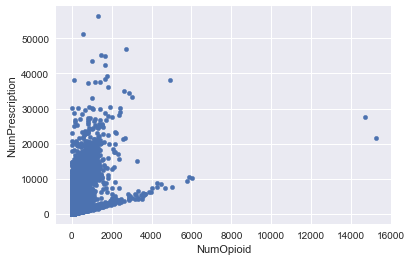

In [8]:
# Number of opioids column appended to prescriber DF
## Sums total number of prescriptions given in prescriber that are also in rxOps
prescriber['NumOpioid'] = prescriber.apply(lambda x: sum(x[rxOps]), axis=1)

# Number of prescriptions column appended to prescriber DF
## Sums total number of prescriptions given in columns 5-255 in prescriber DF
prescriber['NumPrescription'] = prescriber.apply(lambda x: sum(x.iloc[5:255]), axis=1)

# Plot number of opioids vs number of prescriptions per prescriber
prescriber.plot.scatter('NumOpioid', 'NumPrescription')

### Histogram of Opioid Prescription Frequency
Shows frequency of ratios of opioid to total prescriptions by a prescriber  
* This shows that most prescribers (~17500) prescribe opioids 10% or less of the time
* This does show there is an unusual bump in number of prescribers (~1200) who prescribe almost exclusively opioids

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b0675c0>]], dtype=object)

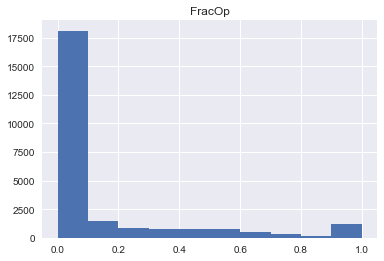

In [9]:
# FracOp is fraction of NumOpioid/NumPrescription for every prescriber
prescriber['FracOp'] = prescriber.apply(lambda x: float(x['NumOpioid'])/x['NumPrescription'], axis=1)

# Histogram of FracOp
prescriber.hist('FracOp')

### Compare Opioid Deaths and State Populations
Pretty linear

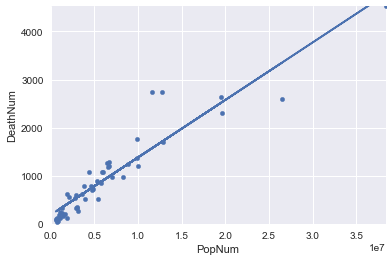

In [50]:
# Scatter plot of deaths over population per state
overdose.plot.scatter('PopNum', 'DeathNum')

# Set axes range
plt.xlim(0, max(overdose['PopNum']))
plt.ylim(0, max(overdose['DeathNum']))

# Linear regression
m, b = np.polyfit(overdose['PopNum'], overdose['DeathNum'], 1)
plt.plot(x, m*x + b, '-')

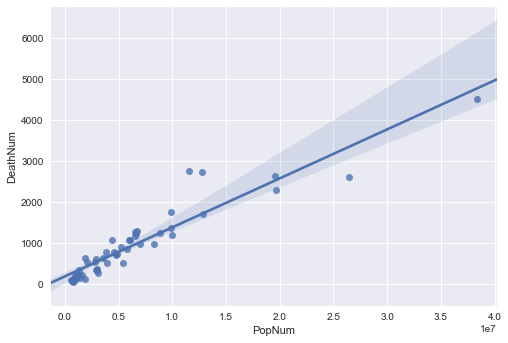

In [86]:
# seaborn.regplot returns the data and a linear regression model fit
## shaded area is confidence interval (default ci=95)
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x='PopNum', y='DeathNum', data=overdose)

### Opioid Prescription by Provider Specialty
* mean_NO shows that Interventional Pain Management, Addiction Medicine, and Pain Management are the top specialties to prescribe opioids
* mean_fracO shows Hand Surgery prescriptions have the largest fraction of opioids
* Although Hand Surgery has the greatest fraction of opioid prescriptions, the pain specialties prescribe the most total

In [89]:
# Average number of opioids prescribed by specialty
mean_NO = prescriber.groupby('Specialty')['NumOpioid'].mean().sort_values(ascending=False)
mean_NO.head()

Specialty
Interventional Pain Management          1173.191489
Addiction Medicine                      1167.000000
Pain Management                         1135.000000
Anesthesiology                           507.507246
Physical Medicine and Rehabilitation     440.150000
Name: NumOpioid, dtype: float64

In [113]:
# Average fraction of opioids among all drug prescribtions by specialty
mean_fracO = prescriber.groupby('Specialty')['FracOp'].mean().sort_values(ascending=False)
mean_fracO.head(10)

Specialty
Hand Surgery                      0.811180
Orthopaedic Surgery               0.691484
Surgery                           0.638596
Orthopedic Surgery                0.623872
General Surgery                   0.622490
Interventional Pain Management    0.600386
Neurological Surgery              0.600000
Surgical Oncology                 0.588958
Pain Management                   0.588498
Addiction Medicine                0.548092
Name: FracOp, dtype: float64

In [93]:
# Look at variance within specialties

# O.Diff is the number of opioids above or below the average prescribed within the specialty
## the total number of opioids minus the average opioids prescribed per specialty
prescriber['O.Diff'] = prescriber.apply(lambda x: x['NumOpioid'] - mean_NO[x['Specialty']], axis=1)

# FracO.Diff is the fraction of opioids above or below the average within the specialty
## the total fraction of opioids prescribed minus the average fraction by specialty
prescriber['FracO.Diff'] = prescriber.apply(lambda x: x['FracOp'] - mean_fracO[x['Specialty']], axis=1)

prescriber.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,NumOpioid,NumPrescription,FracOp,O.Diff,FracO.Diff
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,1,17,29,0.586207,7.946071,0.468841
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,35,1,362,1418,0.255289,314.322382,-0.367201
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,25,0,0,289,0.000000,-142.032389,-0.101075
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,1,559,1757,0.318156,397.113338,0.259342
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,28,0,0,0,1,66,179,0.368715,-13.642202,0.143527


In [112]:
# Average fraction opioids of all prescriptions prescribed by Interventional Pain Management
(prescriber.loc[prescriber['Specialty'] == 'Interventional Pain Management', 'FracOp']).mean()

0.600386179841028